In [1]:
import torch

import torchvision.transforms as transforms
import pylab as pl

from MiraBest import MiraBest_full, MBFRConfident, MBFRUncertain, MBHybrid

---
Define the data transforms for Pytorch:

In [2]:
crop     = transforms.CenterCrop(150)
pad      = transforms.Pad((0, 0, 1, 1), fill=0)
totensor = transforms.ToTensor()
normalise= transforms.Normalize((0.0031,), (0.0352,))

transform = transforms.Compose([
    crop,
    pad,
    totensor,
    normalise,
])

---
Call the dataset class to download the data (if needed) into a user specified directory:

In [3]:
datadir = 'mirabest'
mb_full = MBFRConfident(datadir, train=True, download=True, transform=transform)

Files already downloaded and verified


---
Create a Pytorch dataloader for the data:

In [4]:
batch_size = 5
data_loader = torch.utils.data.DataLoader(mb_full, batch_size=batch_size, shuffle=True)

---
Load a batch of data:

In [8]:
samples = iter(data_loader).next()

---
Visualise a batch of data:

In [9]:
label_map = {'0': 'FRI',
             '1': 'FRII'
}

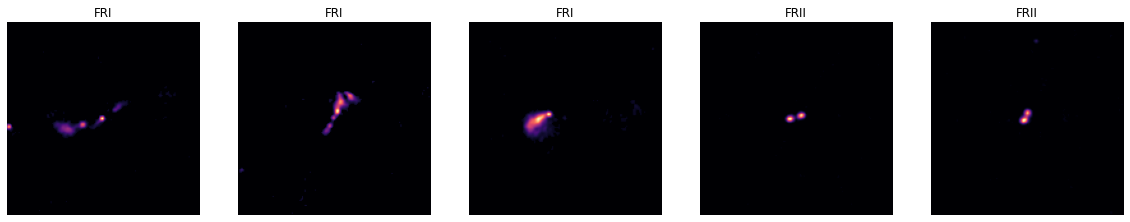

In [10]:
figure = pl.figure(figsize=(20, 20))
for i in range(len(samples[0])):
    img = samples[0][i].squeeze().numpy()
    label = samples[1][i].numpy()
    figure.add_subplot(1, 5, i+1)
    pl.title(label_map[str(label)])
    pl.axis("off")
    pl.imshow(img.squeeze(), cmap="magma")

---
END